# CAP4633C Machine Learning II
## Presentation 2
### Deany Rodriguez, Victor Roa - 12/02/2021

<b> Multi Class classification of 3 types of drugs based on the patients age and  the level of Sodium to Potassium result of the drug administered, using perceptron, logistic regression, support vector machines (linear and kernel), Decision tree, random Forest and K-nearest neighbors </b>

    The first step is to import pandas library and read the drug200.csv file with the data. After defining the dataframe perform a exploratory analysis and prepare the data for the classification models

In [1]:
import pandas as pd
df = pd.read_csv('drug200.csv')

In [2]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,58.0,F,LOW,HIGH,38.247,drugY
1,18.0,F,HIGH,HIGH,37.188,drugY
2,20.0,M,HIGH,NORMAL,35.639,drugY
3,65.0,M,HIGH,NORMAL,34.997,drugY
4,46.0,F,HIGH,HIGH,34.686,drugY
...,...,...,...,...,...,...
164,46.0,M,NORMAL,NORMAL,7.285,drugX
165,55.0,M,NORMAL,NORMAL,7.261,drugX
166,47.0,F,NORMAL,NORMAL,6.683,drugX
167,49.0,M,HIGH,NORMAL,6.269,drugA


First, we need to drop the nulls rows (as we can see in row 168), and them we will modify the classes using numpy's where clause, making DrugX equals to 1, DrugY to 2 and DrugA to 3

In [3]:
import numpy as np
df=df.dropna(axis=0)
df['drugNo'] = np.where(df['Drug'] == 'drugX', 1, 
               np.where(df['Drug']== 'drugY', 2, 
               3))
df

<ipython-input-3-92828b14e7c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['drugNo'] = np.where(df['Drug'] == 'drugX', 1,


,Age,Sex,BP,Cholesterol,Na_to_K,Drug,drugNo
0,58.0,F,LOW,HIGH,38.247,drugY,2
1,18.0,F,HIGH,HIGH,37.188,drugY,2
2,20.0,M,HIGH,NORMAL,35.639,drugY,2
3,65.0,M,HIGH,NORMAL,34.997,drugY,2
4,46.0,F,HIGH,HIGH,34.686,drugY,2
...,...,...,...,...,...,...,...
163,61.0,F,LOW,NORMAL,7.340,drugX,1
164,46.0,M,NORMAL,NORMAL,7.285,drugX,1
165,55.0,M,NORMAL,NORMAL,7.261,drugX,1
166,47.0,F,NORMAL,NORMAL,6.683,drugX,1


We assign the column drugNo (classes) to our y variable, and then we select all the rows and columns 0(Age) and 4(Na_to_K) to our X predictors, all of the variables stores as values arrays

In [4]:
y = df.drugNo.values
X= df.iloc[0:168, [0,4]].values
           
X

array([[58.   , 38.247],
       [18.   , 37.188],
       [20.   , 35.639],
       [65.   , 34.997],
       [46.   , 34.686],
       [47.   , 33.542],
       [33.   , 33.486],
       [52.   , 32.922],
       [65.   , 31.876],
       [23.   , 31.686],
       [47.   , 30.568],
       [31.   , 30.366],
       [38.   , 29.875],
       [29.   , 29.45 ],
       [42.   , 29.271],
       [21.   , 28.632],
       [22.   , 28.294],
       [40.   , 27.826],
       [62.   , 27.183],
       [28.   , 27.064],
       [68.   , 27.05 ],
       [58.   , 26.645],
       [32.   , 25.974],
       [19.   , 25.969],
       [63.   , 25.917],
       [57.   , 25.893],
       [24.   , 25.786],
       [64.   , 25.741],
       [61.   , 25.475],
       [56.   , 25.395],
       [23.   , 25.355],
       [54.   , 24.658],
       [18.   , 24.276],
       [37.   , 23.091],
       [51.   , 23.003],
       [53.   , 22.963],
       [41.   , 22.905],
       [22.   , 22.818],
       [39.   , 22.697],
       [34.   , 22.456],


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)


Perceptron(eta0=0.1, random_state=1)

In [8]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 7


In [9]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.794


In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')


<ipython-input-10-4cd5e22e52b7>:37: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


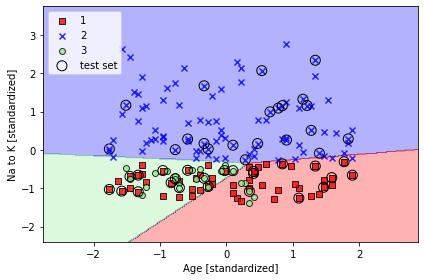

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Age [standardized]')
plt.ylabel('Na to K [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [23]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Logistic cost function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # note that we compute the logistic `cost` now
            # instead of the sum of squared errors cost
            
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) # See above logistic cost function
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

<ipython-input-23-d2788c353848>:58: RuntimeWarning: divide by zero encountered in log
  cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) # See above logistic cost function


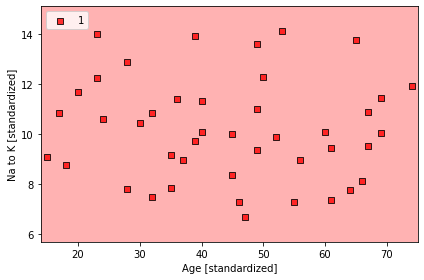

In [29]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.5, n_iter=100, random_state=2)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('Age [standardized]')
plt.ylabel('Na to K [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

<ipython-input-10-4cd5e22e52b7>:37: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


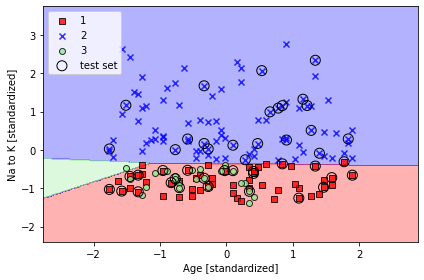

In [14]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('Age [standardized]')
plt.ylabel('Na to K [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-10-4cd5e22e52b7>:37: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


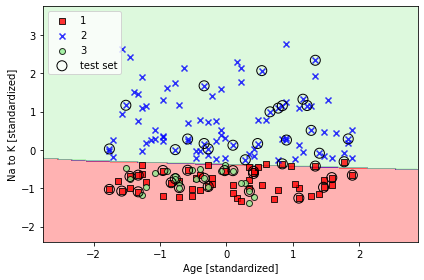

In [15]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1,  random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('Age [standardized]')
plt.ylabel('Na to K [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()


<ipython-input-10-4cd5e22e52b7>:37: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


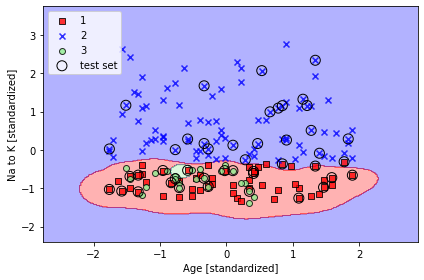

In [16]:
svm = SVC(kernel='rbf', random_state=1, gamma=5, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('Age [standardized]')
plt.ylabel('Na to K [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-10-4cd5e22e52b7>:37: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


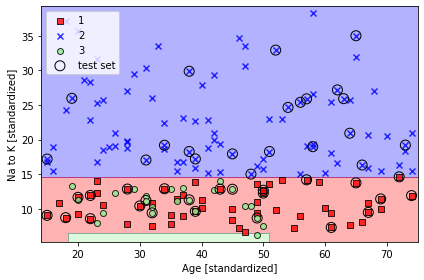

In [17]:

from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('Age [standardized]')
plt.ylabel('Na to K [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

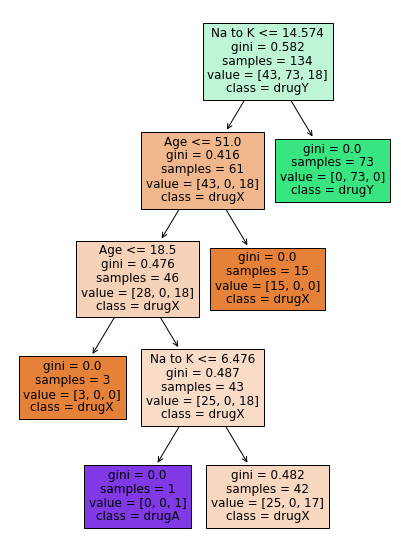

In [18]:
from sklearn import tree
a1D = np.array(["Age", "Na to K"])
a2D = np.array(["drugX", "drugY", "drugA"])

plt.figure(figsize=(7,10))
tree.plot_tree(tree_model,feature_names=a1D,class_names=a2D,filled=True)
plt.show()

<ipython-input-10-4cd5e22e52b7>:37: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


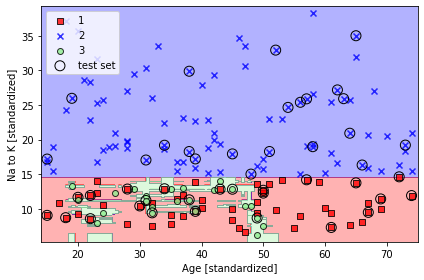

In [19]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('Age [standardized]')
plt.ylabel('Na to K [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-10-4cd5e22e52b7>:37: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


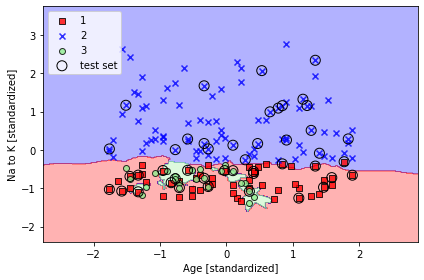

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('Age [standardized]')
plt.ylabel('Na to K [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()